In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width','petal-width', 'Class']
dataset = pd.read_csv(url, names = names)

In [13]:
dataset.head()

,sepal-length,sepal-width,petal-width,Class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = dataset.drop('Class', axis = 1)
Y = dataset['Class']

# X= dataset.iloc[:, :-1].values
# Y= dataset.iloc[:, :-1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

**Scale The Features**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.92      0.96        13
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.93        30
      macro avg       0.92      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30

[[12  1  0]
 [ 0  7  1]
 [ 0  0  9]]


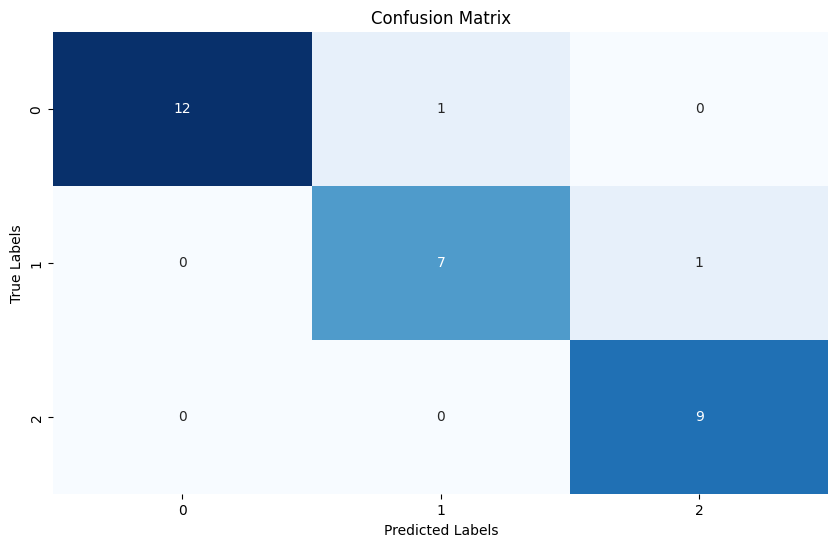

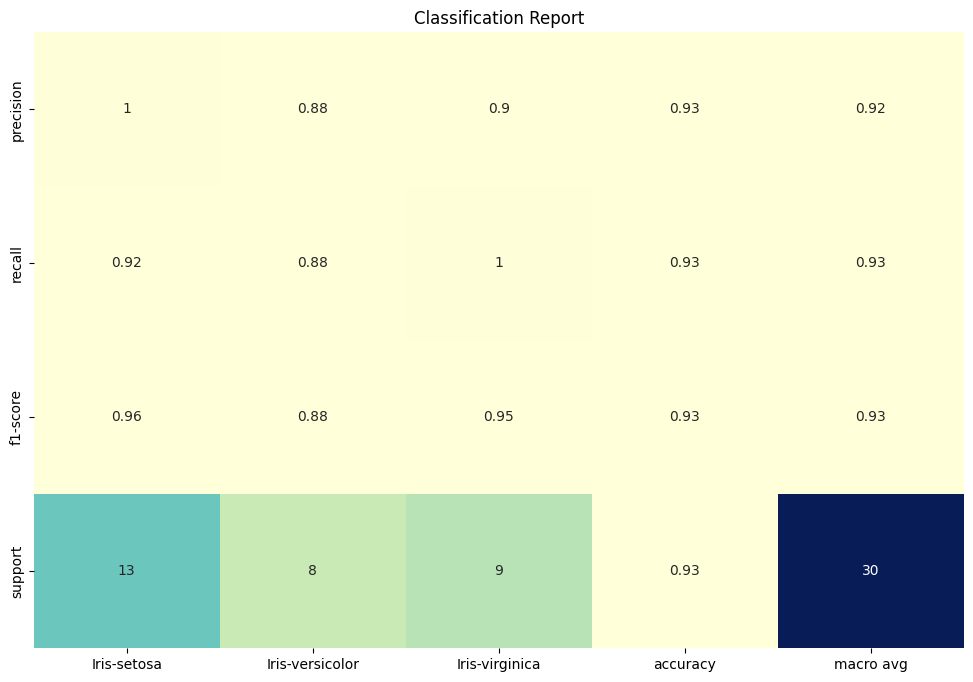

In [20]:
import seaborn as sns

# Assuming y_test and y_pred are already defined
# Generate the classification report and confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting the Classification Report
class_report_df = pd.DataFrame(class_report).T
plt.figure(figsize=(12, 8))
sns.heatmap(class_report_df.iloc[:-1, :].T, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Classification Report')
plt.show()
